In [1]:
# IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import folium

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# LOAD DATASET GPS
url = "/content/drive/MyDrive/PRAKTIKUM ML/praktikum 11/Data/dataset_gempa_gps.csv"
data = pd.read_csv(url)

In [4]:
print("5 data teratas:")
display(data.head())


5 data teratas:


,latitude,longitude,mag,depth,place
0,-6.20,106.80,4.2,10,Jakarta
1,-6.21,106.81,3.8,12,Jakarta
2,-6.22,106.82,4.0,15,Jakarta
3,-6.50,106.90,5.1,20,Depok
4,-6.51,106.91,4.9,18,Depok


In [5]:
print("\nInfo dataset:")
print(data.info())


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   10 non-null     float64
 1   longitude  10 non-null     float64
 2   mag        10 non-null     float64
 3   depth      10 non-null     int64  
 4   place      10 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 532.0+ bytes
None



Statistik deskriptif:


,latitude,longitude,mag,depth
count,10.00000,10.000000,10.000000,10.000000
mean,14.60900,-6.539000,3.910000,14.100000
std,22.11145,119.530073,0.884998,6.983313
min,-6.51000,-122.430000,2.500000,5.000000
25%,-6.21750,-118.267500,3.200000,8.500000
50%,13.92500,-5.725000,4.100000,13.500000
75%,34.06750,106.817500,4.450000,19.500000
max,37.78000,106.910000,5.100000,25.000000


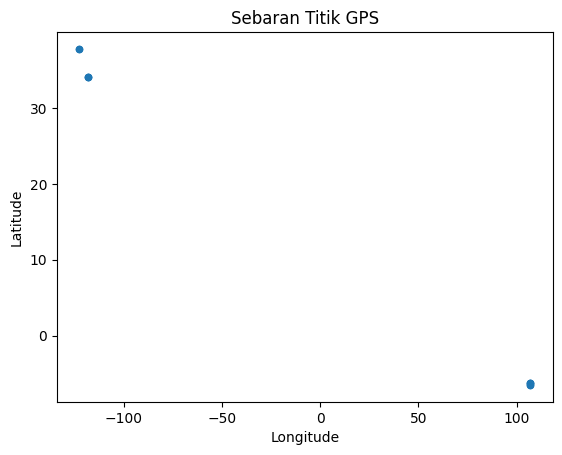

In [6]:
# EDA – EKSPLORASI DATA
print("\nStatistik deskriptif:")
display(data.describe())

plt.scatter(data["longitude"], data["latitude"], s=20)
plt.title("Sebaran Titik GPS")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



In [7]:
# DATA PREPARATION
# Ambil kolom GPS
coords = data[["latitude", "longitude"]].values

# DBSCAN dengan Haversine butuh radian
coords_rad = np.radians(coords)

# eps = radius cluster (dalam kilometer)
kms_per_radian = 6371.0088
eps = 50 / kms_per_radian

print("EPS (radian):", eps)

EPS (radian): 0.007848050688613082


In [8]:
# MODELING – DBSCAN
db = DBSCAN(
    eps=eps,
    min_samples=3,
    metric='haversine'
).fit(coords_rad)

data["cluster"] = db.labels_

print("\nJumlah cluster ditemukan:", len(set(data["cluster"])))
print(data["cluster"].value_counts())



Jumlah cluster ditemukan: 3
cluster
 0    5
 1    3
-1    2
Name: count, dtype: int64


In [9]:
# VISUALISASI HASIL CLUSTER DI MAP (Folium)
from IPython.display import display

# Tentukan lokasi map awal (Indonesia)
m = folium.Map(location=[-6.2, 106.8], zoom_start=3)

for _, row in data.iterrows():
    warna = "red" if row["cluster"] == -1 else "blue"

    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=5,
        color=warna,
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

display(m)

